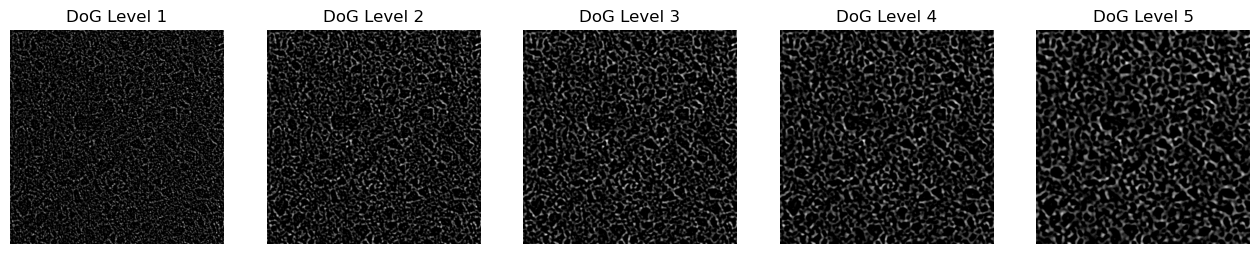

In [2]:
# Gaussain Pyrmaid
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_pyramid(img, num_octaves, num_scales, initial_sigma, sigma):
    """ 生成高斯金字塔 """
    pyramid = []
    k = 2 ** (1 / num_scales)

    for _ in range(num_octaves):
        octave = [img]
        for _ in range(1, num_scales + 3):
            sigma = initial_sigma * (k ** len(octave))
            img_blurred = cv2.GaussianBlur(img, (0, 0), sigma)
            octave.append(img_blurred)
        pyramid.append(octave)
        img = cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2))
    return pyramid

def generate_DoG_pyramid(gaussian_pyramid):
    """ 生成高斯差分金字塔 """
    dog_pyramid = []
    for octave in gaussian_pyramid:
        dog_octave = []
        for i in range(1, len(octave)):
            dog = cv2.subtract(octave[i], octave[i - 1])
            dog_octave.append(dog)
        dog_pyramid.append(dog_octave)
    return dog_pyramid

path = "../images/ct-bse"
# 加载图像（替换为您的图像路径）
image = cv2.imread(f'{path}/ct_new.bmp', cv2.IMREAD_GRAYSCALE)

# 生成高斯金字塔
num_octaves = 4
num_scales = 3
initial_sigma = 1.6
sigma = 1.6
gaussian_pyramid = generate_gaussian_pyramid(image, num_octaves, num_scales, initial_sigma, sigma)

# 生成高斯差分金字塔
dog_pyramid = generate_DoG_pyramid(gaussian_pyramid)

# 可视化高斯差分金字塔中的一个八度
plt.figure(figsize=(16, 8))
for i, img in enumerate(dog_pyramid[0], 1):
    plt.subplot(1, len(dog_pyramid[0]), i), plt.imshow(img, cmap='gray')
    plt.title('DoG Level {}'.format(i))
    plt.axis('off')
plt.show()


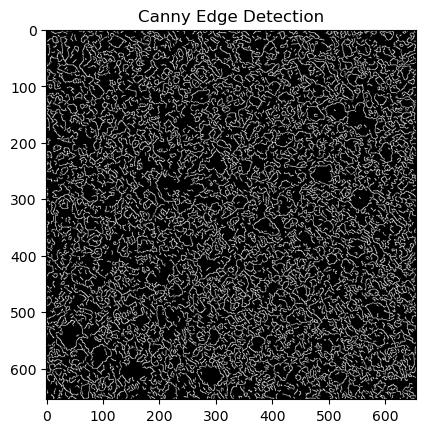

In [14]:
# canny edge detector
import cv2
import matplotlib.pyplot as plt

def apply_canny_edge_detector(image_path, low_threshold, high_threshold):
    """
    应用Canny边缘检测器。

    参数:
    - image_path: 图像文件的路径。
    - low_threshold: Canny检测器的低阈值。
    - high_threshold: Canny检测器的高阈值。
    
    返回:
    - 边缘检测结果图像。
    """
    # 读取图像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 应用Canny边缘检测
    edges = cv2.Canny(image, low_threshold, high_threshold)

    return edges

# 使用示例
path = "../images/ct-bse"
# 加载图像（替换为您的图像路径）
image_path = f'{path}/ct_new_high_contrast.bmp'  # 替换为您的图像路径
low_threshold = 150
high_threshold = 220

# 应用Canny边缘检测
edges = apply_canny_edge_detector(image_path, low_threshold, high_threshold)

# 显示结果
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


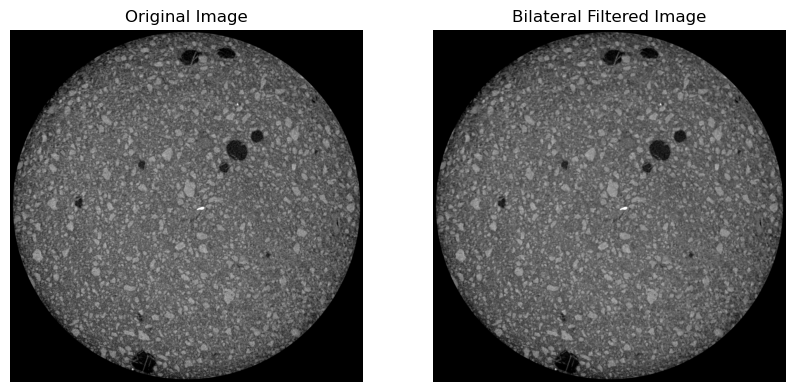

In [11]:
import cv2
from matplotlib import pyplot as plt


# 替换为您的图像文件路径
path = "../datasets/sample4/bse/100"
# 加载图像（替换为您的图像路径）
image_path = f'{path}/4-1-1-ct.bmp'  # 替换为您的图像路径
save_path = f'{path}/4-1-1-ct-bi-2.bmp'  # 替换为您的图像路径

# 以灰度模式读取图像
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 确保图像加载成功
if gray_image is not None:
    # 应用双边滤波
    diameter = 9         # 邻域直径
    sigma_color = 10     # 颜色空间的标准方差
    sigma_space = 50     # 坐标空间的标准方差
    bilateral_filtered_image = cv2.bilateralFilter(gray_image, diameter, sigma_color, sigma_space)

    # 显示原始图像和滤波后的图像
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1), plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(1, 2, 2), plt.imshow(bilateral_filtered_image, cmap='gray')
    plt.title('Bilateral Filtered Image'), plt.axis('off')
    plt.show()

    # 保存滤波后的图像
    cv2.imwrite(save_path, bilateral_filtered_image)
else:
    print("无法加载图像，请检查您的文件路径。")



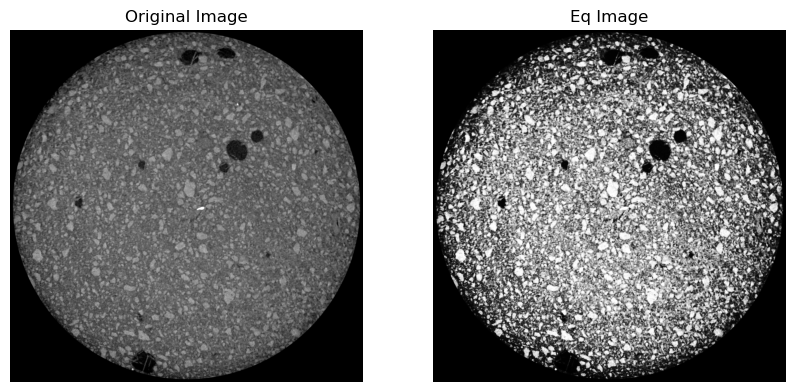

In [12]:
# 替换为您的图像文件路径
path = "../datasets/sample4/bse/100"
# 加载图像（替换为您的图像路径）
image_path = f'{path}/4-1-1-ct-bi-2.bmp'  # 替换为您的图像路径
# 以灰度模式读取图像
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 进行均衡化
hist_eq = cv2.equalizeHist(gray_image)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(gray_image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(hist_eq, cmap='gray')
plt.title('Eq Image'), plt.axis('off')
plt.show()


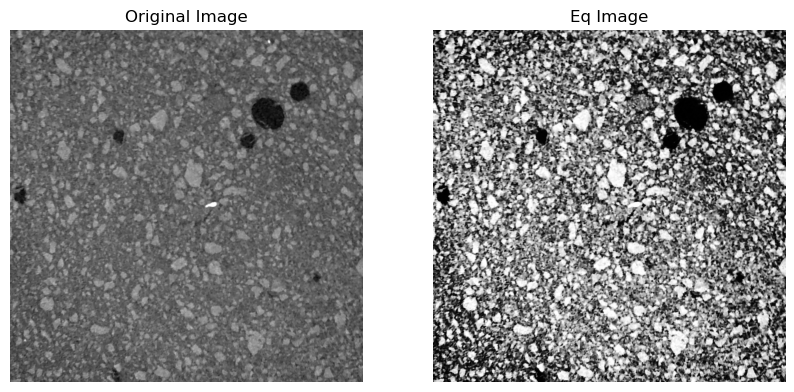

In [13]:
# 替换为您的图像文件路径
path = "../datasets/sample4/bse/100"
# 加载图像（替换为您的图像路径）
image_path = f'{path}/4-1-1-ct-bi-crop.bmp'  # 替换为您的图像路径
# 以灰度模式读取图像
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 进行均衡化
hist_eq = cv2.equalizeHist(gray_image)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(gray_image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(hist_eq, cmap='gray')
plt.title('Eq Image'), plt.axis('off')
plt.show()
